In [96]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import linregress
from scipy.stats import linregress

# Starting URL for Weather Map API Call.
url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

In [54]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [55]:
# Create a practice set of random latitude and longitude combinations.
lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
lat_lngs = zip(lats, lngs)

In [56]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [57]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [58]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [59]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [60]:
from citipy import citipy

In [61]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

5

In [62]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [63]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [64]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [69]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Processing Record 16 of Set 1 | cockburn town
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 1 | gat
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 1 | parvatsar
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 1 | punta arenas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 1 | saint george
-----------------------------
Data Retrieval Complete      
-----------------------------


In [70]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint George,37.1041,-113.5841,109.44,14,0,6.91,US,2022-07-16 23:18:00
1,Cockburn Town,21.4612,-71.1419,82.36,78,40,17.27,TC,2022-07-16 23:20:05
2,Gat,31.6100,34.7642,75.88,100,0,2.37,IL,2022-07-16 23:20:06
3,Parvatsar,26.8833,74.7667,79.20,83,89,11.27,IN,2022-07-16 23:20:06
4,Punta Arenas,-53.1500,-70.9167,33.91,69,75,11.50,CL,2022-07-16 23:20:07
5,Saint George,37.1041,-113.5841,109.44,14,0,6.91,US,2022-07-16 23:18:00
6,Saint George,37.1041,-113.5841,109.44,14,0,6.91,US,2022-07-16 23:18:00
7,Cockburn Town,21.4612,-71.1419,82.36,78,40,17.27,TC,2022-07-16 23:20:05
8,Gat,31.6100,34.7642,75.88,100,0,2.37,IL,2022-07-16 23:20:06
9,Parvatsar,26.8833,74.7667,79.20,83,89,11.27,IN,2022-07-16 23:20:06


In [72]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [81]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint George,37.1041,-113.5841,109.44,14,0,6.91,US,2022-07-16 23:18:00
1,Cockburn Town,21.4612,-71.1419,82.36,78,40,17.27,TC,2022-07-16 23:20:05
2,Gat,31.6100,34.7642,75.88,100,0,2.37,IL,2022-07-16 23:20:06
3,Parvatsar,26.8833,74.7667,79.20,83,89,11.27,IN,2022-07-16 23:20:06
4,Punta Arenas,-53.1500,-70.9167,33.91,69,75,11.50,CL,2022-07-16 23:20:07
5,Saint George,37.1041,-113.5841,109.44,14,0,6.91,US,2022-07-16 23:18:00
6,Saint George,37.1041,-113.5841,109.44,14,0,6.91,US,2022-07-16 23:18:00
7,Cockburn Town,21.4612,-71.1419,82.36,78,40,17.27,TC,2022-07-16 23:20:05
8,Gat,31.6100,34.7642,75.88,100,0,2.37,IL,2022-07-16 23:20:06
9,Parvatsar,26.8833,74.7667,79.20,83,89,11.27,IN,2022-07-16 23:20:06


In [82]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime('%x')
today

'07/16/22'

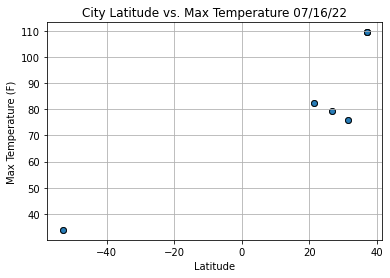

In [89]:

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

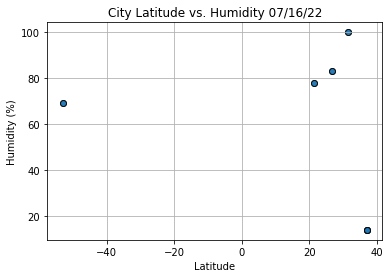

In [84]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

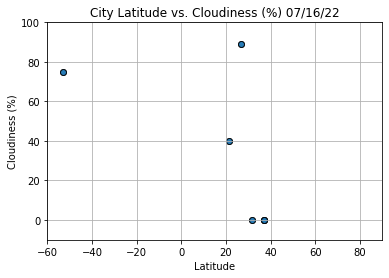

In [88]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylim(-10,100)
plt.xlim(-60,90)
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

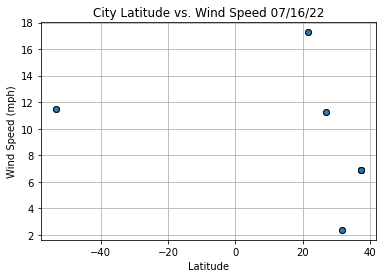

In [90]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [98]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [99]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint George,37.1041,-113.5841,109.44,14,0,6.91,US,2022-07-16 23:18:00
1,Cockburn Town,21.4612,-71.1419,82.36,78,40,17.27,TC,2022-07-16 23:20:05
2,Gat,31.6100,34.7642,75.88,100,0,2.37,IL,2022-07-16 23:20:06
3,Parvatsar,26.8833,74.7667,79.20,83,89,11.27,IN,2022-07-16 23:20:06
5,Saint George,37.1041,-113.5841,109.44,14,0,6.91,US,2022-07-16 23:18:00
6,Saint George,37.1041,-113.5841,109.44,14,0,6.91,US,2022-07-16 23:18:00
7,Cockburn Town,21.4612,-71.1419,82.36,78,40,17.27,TC,2022-07-16 23:20:05
8,Gat,31.6100,34.7642,75.88,100,0,2.37,IL,2022-07-16 23:20:06
9,Parvatsar,26.8833,74.7667,79.20,83,89,11.27,IN,2022-07-16 23:20:06
11,Saint George,37.1041,-113.5841,109.44,14,0,6.91,US,2022-07-16 23:18:00


In [100]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint George,37.1041,-113.5841,109.44,14,0,6.91,US,2022-07-16 23:18:00
1,Cockburn Town,21.4612,-71.1419,82.36,78,40,17.27,TC,2022-07-16 23:20:05
2,Gat,31.6100,34.7642,75.88,100,0,2.37,IL,2022-07-16 23:20:06
3,Parvatsar,26.8833,74.7667,79.20,83,89,11.27,IN,2022-07-16 23:20:06
5,Saint George,37.1041,-113.5841,109.44,14,0,6.91,US,2022-07-16 23:18:00


In [101]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

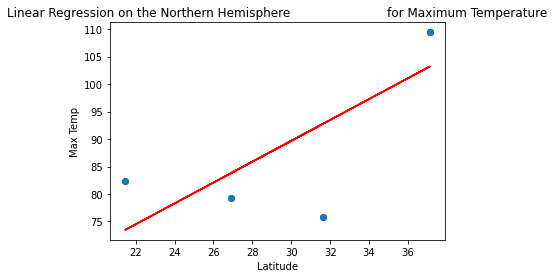

In [102]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

c:\Users\Jennings\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm


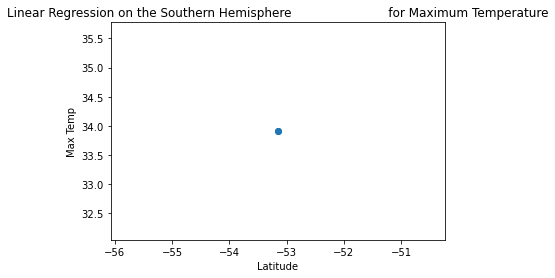

In [103]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

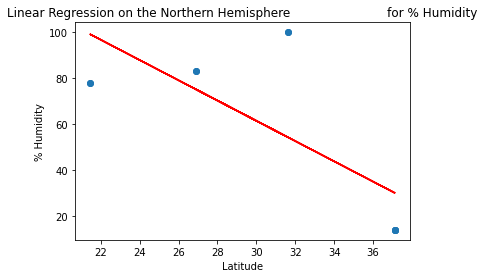

In [104]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

c:\Users\Jennings\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm


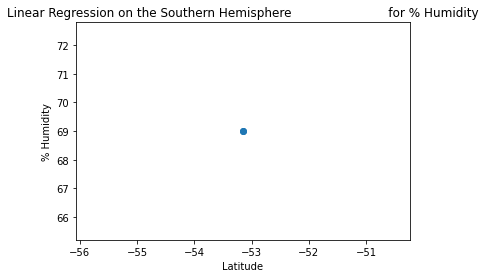

In [105]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

c:\Users\Jennings\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm


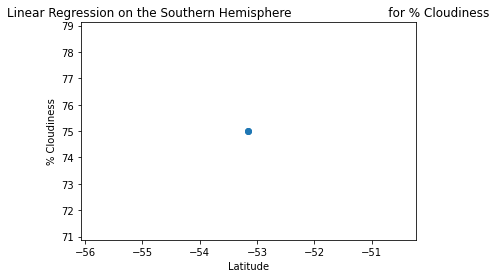

In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

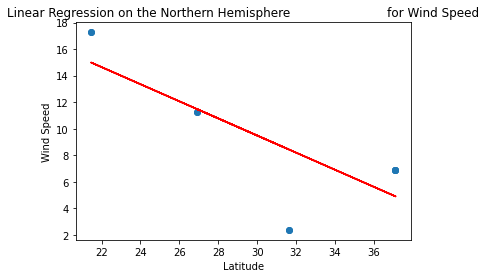

In [107]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

c:\Users\Jennings\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm


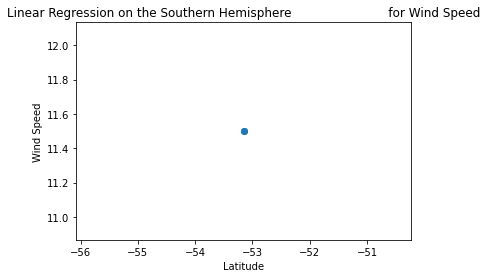

In [108]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))